### Importing Required Libraries

In [293]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re
import nltk
import string
from nltk.corpus import *
from wordcloud import *
from sklearn import *
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import *
from sklearn.tree import *
from sklearn.feature_extraction.text import *
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import *
from sklearn.metrics import *
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

### **Step1**: Acquire
<pre><b> • Explore problem<b> </pre>
<pre><b> • Identify data<b> </pre>
<pre><b> • Import data<b> </pre>

### **Data**
#### <pre><b>• Import and read the data</pre>

In [294]:
df=pd.read_csv('ds_salaries.csv')
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [295]:
df.drop(columns=['Unnamed: 0'],inplace=True)
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [296]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

### **Step2**: Prepare
<pre><b> • Explore data<b> </pre>
<pre><b> • Visualize ideas<b> </pre>
<pre><b> • Cleaning data<b> </pre>


In [297]:
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [298]:
df.duplicated().sum()

42

In [299]:
df=df.drop_duplicates()

In [300]:
df.duplicated().sum()

0

In [301]:
df = df.reset_index(drop=True)

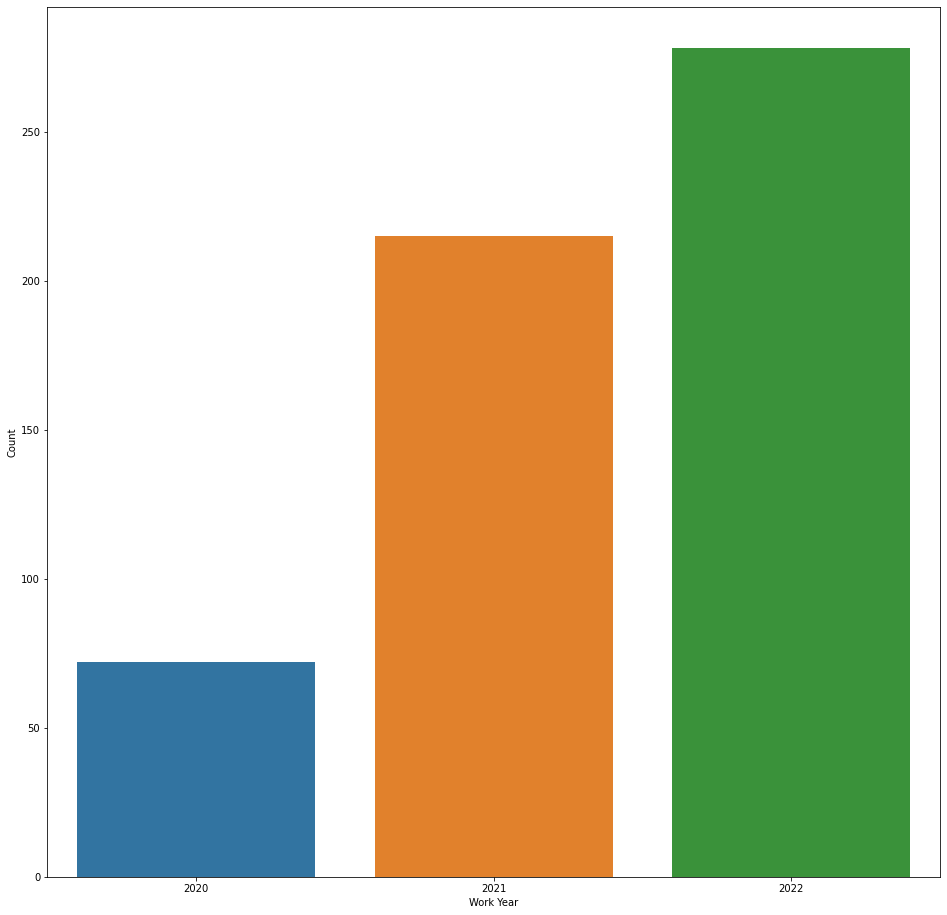

In [302]:
plt.figure(figsize=(16,16))
sns.countplot(df['work_year'])
plt.xlabel('Work Year');plt.ylabel('Count')
plt.show()

In [303]:
fig=px.pie(df['job_title'].value_counts(),values=df['job_title'].value_counts().values,names=df['job_title'].value_counts().index)
fig.update_traces(textposition='inside')

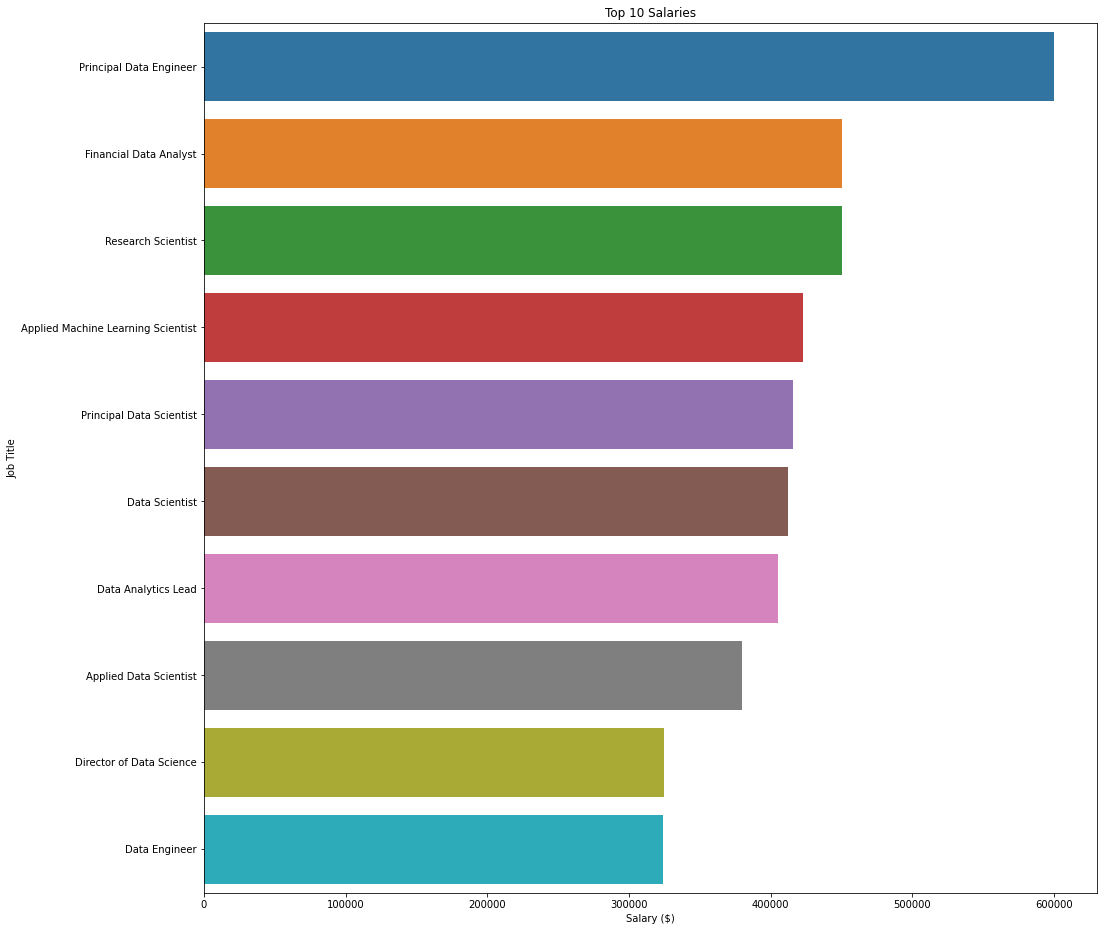

In [304]:
plt.figure(figsize=(16,16))
part_df=df.sort_values('salary_in_usd',ascending=False).head(10)
sns.barplot(x=part_df['salary_in_usd'],y=part_df['job_title'])
plt.xlabel('Salary ($)');plt.ylabel('Job Title')
plt.title('Top 10 Salaries')
plt.show()

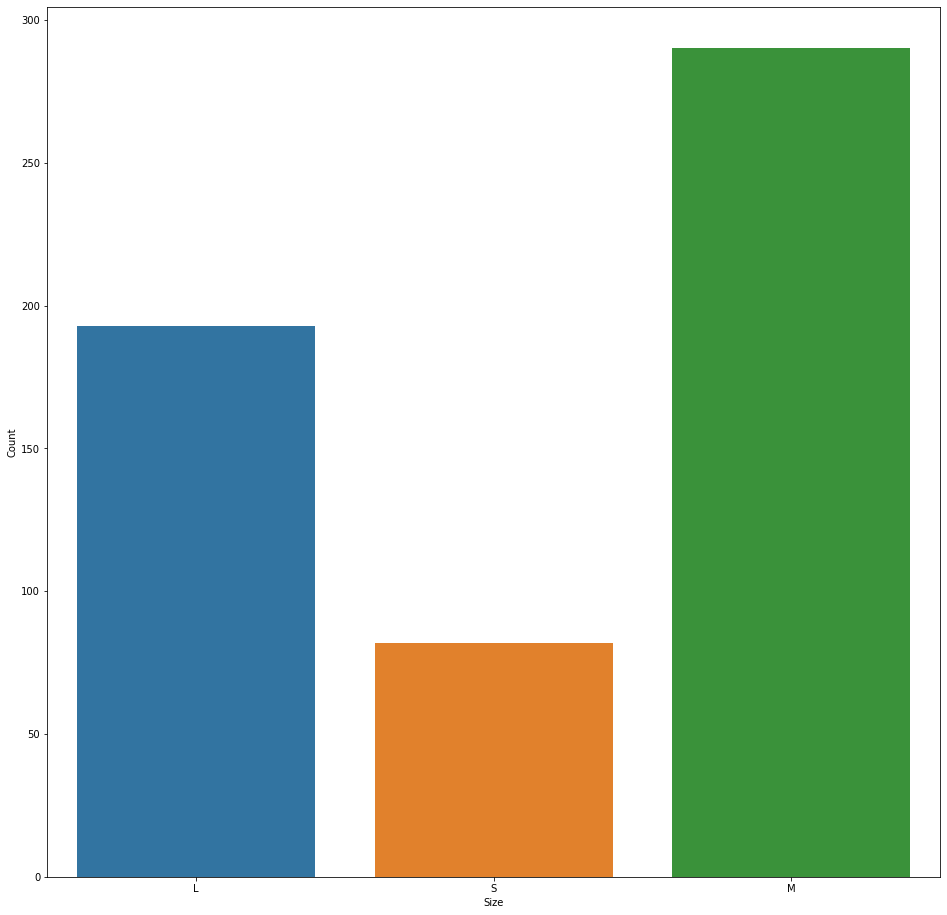

In [305]:
plt.figure(figsize=(16,16))
sns.countplot(df['company_size'])
plt.xlabel('Size');plt.ylabel('Count')
plt.show()

### **Step3**: Analyze
<pre><b> • Feature selection<b> </pre>
<pre><b> • Model selection<b> </pre>
<pre><b> • Analyze data<b> </pre>

In [306]:
df=df[df['job_title'].isin(['Data Engineer', 'Data Scientist', 'Data Analyst'])]

In [307]:
df.drop(columns=['work_year','employee_residence','company_location','salary','salary_currency'],inplace=True)

In [308]:
df = pd.get_dummies(data=df, columns=['experience_level', 'employment_type', 'job_title', 'remote_ratio', 'company_size'])
df

,salary_in_usd,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_FL,employment_type_FT,employment_type_PT,job_title_Data Analyst,job_title_Data Engineer,job_title_Data Scientist,remote_ratio_0,remote_ratio_50,remote_ratio_100,company_size_L,company_size_M,company_size_S
0,79833,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0
5,72000,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0
7,35735,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0
10,51321,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1
11,40481,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559,52000,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0
560,154000,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0
561,126000,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0
562,129000,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0


In [309]:
df2=df.drop(columns='salary_in_usd')
target=df[['salary_in_usd']]
x_train,x_test,y_train,y_test=train_test_split(df2,target,random_state=42,test_size=0.2)

In [310]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [311]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
y_predict_tr = lr.predict(x_train)
print('R-squared for training data is {}'.format(r2_score(y_predict_tr, y_train)))
print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_predict_tr, y_train))))

R-squared for training data is -0.15503499698019074
RMSE for training data is 42560.38900268829


In [312]:
y_predict_te = lr.predict(x_test)
print('R-squared for testing data is {}'.format(r2_score(y_predict_te, y_test)))
print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_predict_te, y_test))))

R-squared for testing data is -0.7367871092636369
RMSE for testing data is 48115.236603574034
